In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv("Zomato data .csv")

In [37]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [19]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [20]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Convert the data type of column rate

In [57]:
def handleRate (value):
    value = str(value).split('/')
    value = value[0]
    return float (value)
df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


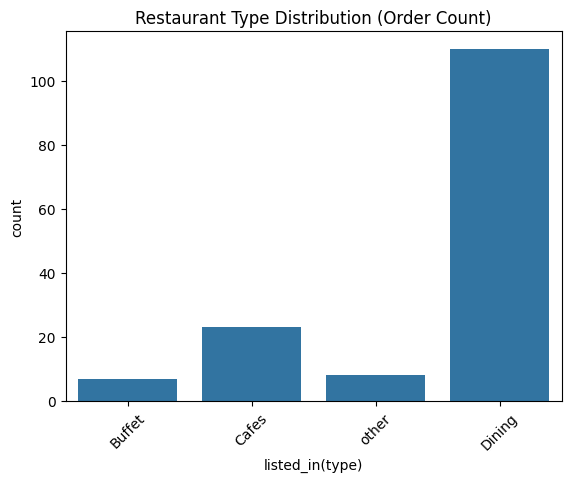

In [9]:
#which type of restaurant do the majority of customers order from
sns.countplot(x='listed_in(type)', data =df)
plt.xticks(rotation =45) # Rotate x asis labels for better readability
plt.title ('Restaurant Type Distribution (Order Count)')
plt.show()


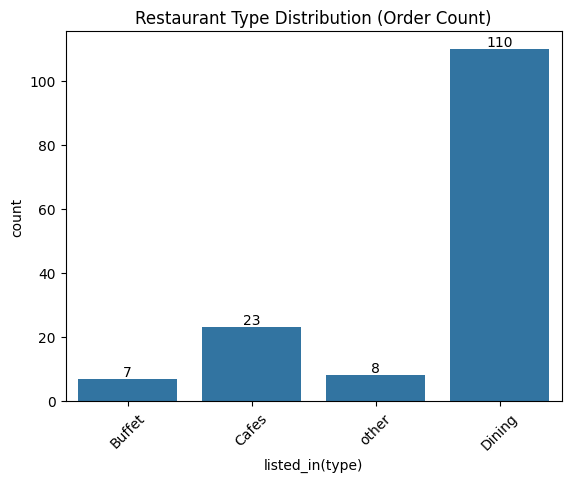

In [10]:
ax= sns.countplot(x='listed_in(type)', data =df)
plt.xticks(rotation =45) # Rotate x asis labels for better readability
plt.title ('Restaurant Type Distribution (Order Count)')
ax.bar_label(ax.containers[0])
plt.show()


from the above count plot we obsereve that most of the people prefer dinning type of restaurant

Text(0, 0.5, 'votes')

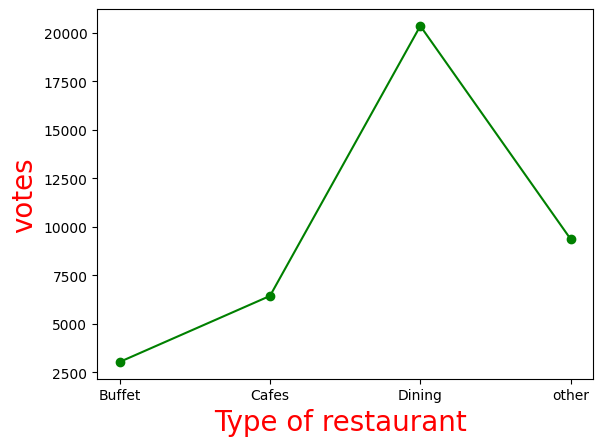

In [29]:
#how many votes has each type of restaurant recieved from customers?
group_data = df.groupby('listed_in(type)' ) ['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result,c = 'green' , marker = 'o')
plt.xlabel('Type of restaurant ', c = 'red', size = 20)
plt.ylabel('votes' , c = 'red' , size =20)



           

from above graph we can conclude that the dining type of restaurant recieved max votes

In [20]:
#the most common rating / higest rating
most_common_rating = df['rate'].mode()[0]

print("The most common rating is:", most_common_rating)

The most common rating is: 3.8/5


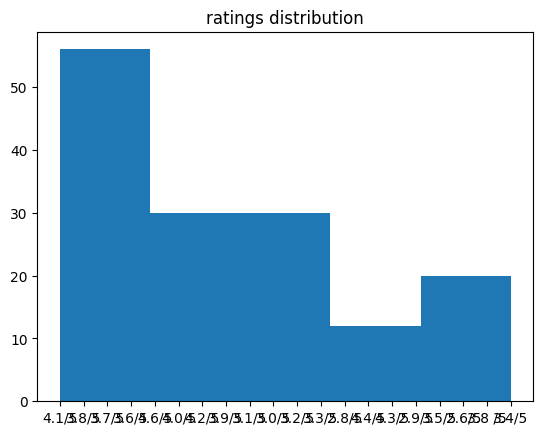

In [30]:
plt.hist(df['rate'],bins=5)
plt.title('ratings distribution')
plt.show()

common ratings got all resturant is 3.8

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

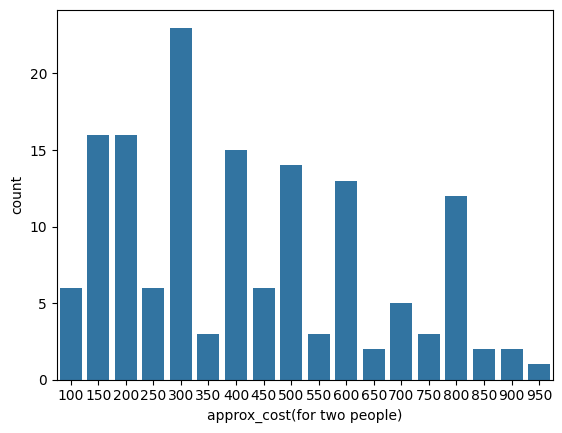

In [33]:
#zomato has observed that most couples order most of their food online. what is there avaerage spending
# on each other
couple_data = df['approx_cost(for two people)']
sns.countplot(x= couple_data)

conclusion the majority of couples oerfer restaurants with an approximate cost of 300 rs

In [54]:
#highest count


In [48]:
order_counts = df['online_order'].value_counts()

order_counts


online_order
No     90
Yes    58
Name: count, dtype: int64

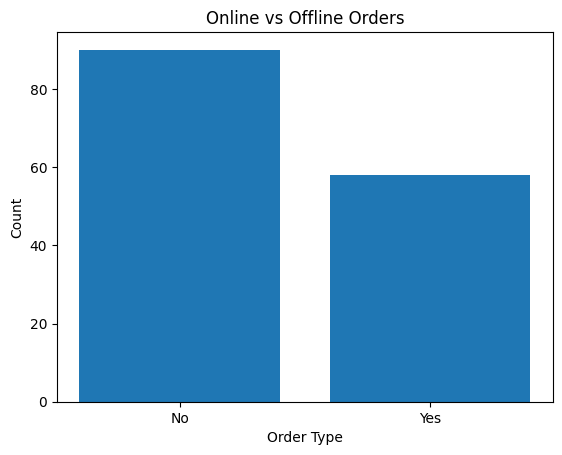

In [53]:
order_counts = df['online_order'].value_counts()

# Create a bar chart
plt.bar(order_counts.index, order_counts.values)
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Online vs Offline Orders')

plt.show()

from above graph the offline order has highest count


In [ ]:
#raings in between online order vs offline order


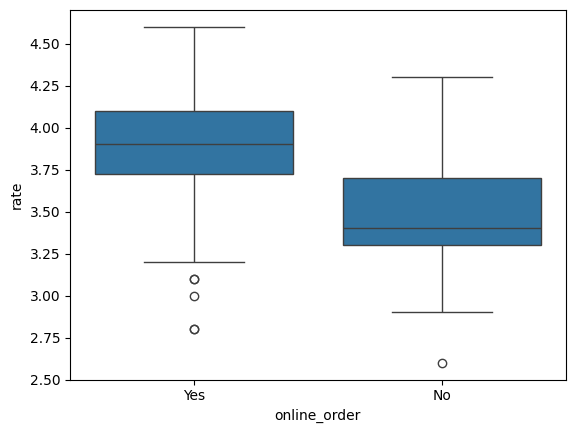

In [58]:
sns.boxplot(x = 'online_order', y = 'rate', data=df)
plt.show()

conclusion - offline order recieved lower ratings(worst rating) in comparison to online order

In [60]:
#which type of restaurant receieved more offline order , so that zomato can provide customers with good offers


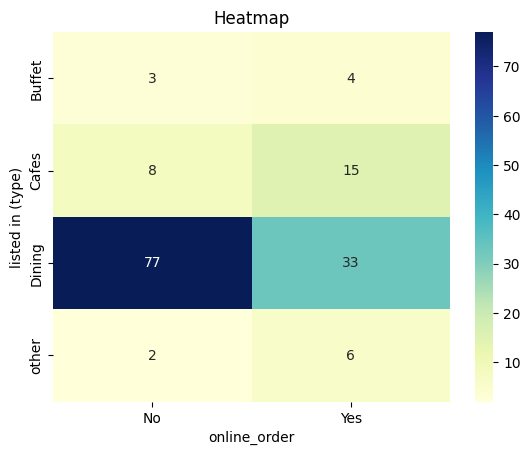

In [65]:
pivot_table = df.pivot_table(index= 'listed_in(type)', columns = 'online_order' , aggfunc = 'size', fill_value =0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu' , fmt= 'd')
plt.title('Heatmap')
plt.xlabel("online_order")
plt.ylabel("listed in (type)")
plt.show()

#conclusuin - Dining type of restaurant has maximum type of order
